# Monocular Depth Estimation

In this notebook, we delve into monocular depth estimation, a process of determining the distance of objects in an image relative to the camera using a single camera input. We employ the cutting-edge Depth-AnythingV2 model to estimate depth. Depth estimation plays a critical role in autonomous driving, supporting essential downstream tasks such as path planning, obstacle detection and avoidance.

In [1]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests
import os
import matplotlib.pyplot as plt
import cv2

### Depth Estimation

We run the depth estimation model on sample images from the OpenLaneV2 dataset 

In [2]:

# Load Depth Estimation model from Hugging face
image_processor = AutoImageProcessor.from_pretrained("depth-anything/Depth-Anything-V2-Small-hf")
model = AutoModelForDepthEstimation.from_pretrained("depth-anything/Depth-Anything-V2-Small-hf")

# images 
images = [f"./data/{img}" for img in os.listdir('./data/') if img != '.DS_Store']

In [3]:
depth_map = []

for img in images:
    image = Image.open(img)
    # performs transformations like normalization, resize etc
    inputs = image_processor(images=image, return_tensors="pt")
    
    with torch.no_grad():
        
        # get predictions
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth
        
    # interpolate the depth map to original image size
    prediction = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1),
        size=image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    # visualize the prediction
    output = prediction.squeeze().cpu().numpy()
    formatted = (output * 255 / np.max(output)).astype("uint8")# normalize depth values [0,255]
    depth = Image.fromarray(formatted)
    depth_map.append(depth)

    

In [4]:
# Function to visualize image and depth map
def visualize(orig_image, depth_map):
    # create a grid
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
    
    axs[0].imshow(orig_image)
    axs[0].axis('off')
    
    
    axs[1].imshow(depth_map)
    axs[1].axis('off')
    
    plt.show()


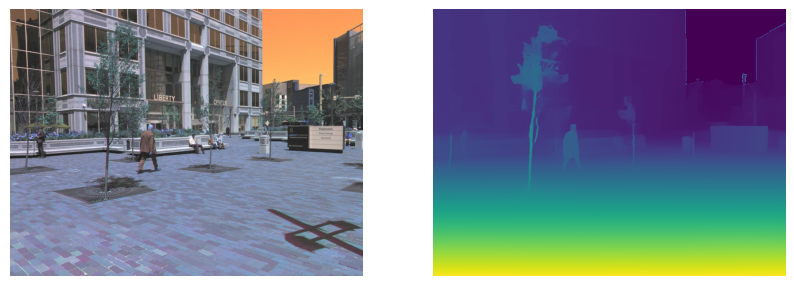

In [5]:
# Sample visualization 1
img_arr = cv2.imread(images[0])

visualize(img_arr, depth_map[0])

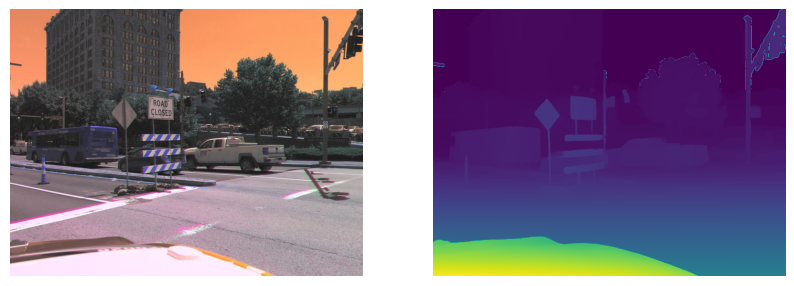

In [6]:
# Sample visualization 2
img_arr = cv2.imread(images[1])

visualize(img_arr, depth_map[1])

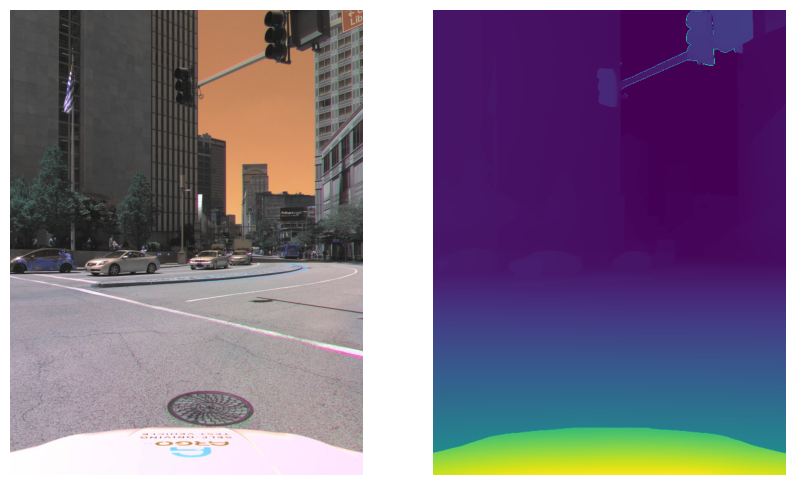

In [7]:
# Sample visualization 3
img_arr = cv2.imread(images[2])

visualize(img_arr, depth_map[2])

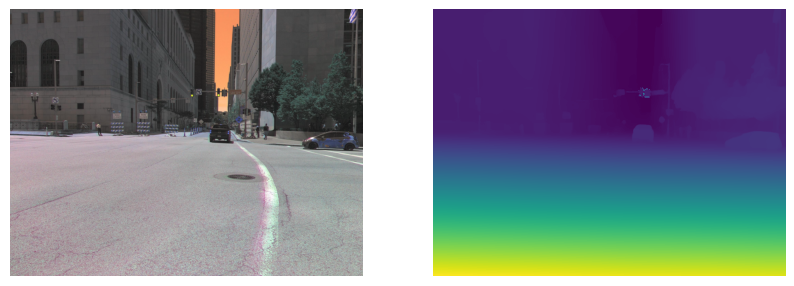

In [8]:
# Sample visualization 4
img_arr = cv2.imread(images[3])

visualize(img_arr, depth_map[3])